1. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [7]:
import numpy as np
a = np.random.rand(30).reshape(10, 3)
i=0
print(a)
while i<10: 
    c = np.argmin(np.abs(a[i] - 0.5))
    print (a[i][c])
    i=i+1

[[0.46211328 0.04906603 0.9988854 ]
 [0.67250974 0.36173739 0.36612704]
 [0.24346218 0.44947502 0.7039431 ]
 [0.63240179 0.02243569 0.67720706]
 [0.24942553 0.64027177 0.59114062]
 [0.38548113 0.89345146 0.03031966]
 [0.65864246 0.79283908 0.11900283]
 [0.18942477 0.86294059 0.82867747]
 [0.44340832 0.28703648 0.12269009]
 [0.33380226 0.97245171 0.56526974]]
0.4621132770941785
0.3661270445767627
0.44947501795046285
0.6324017943762142
0.5911406181134145
0.38548113120065397
0.6586424576529037
0.18942477381566258
0.44340832041381173
0.5652697351922887


2. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [8]:
import numpy as np
a = np.random.rand(36).reshape(6, 6)
print(a)
print(np.sum(a,1)/np.min(a,0))

[[0.68983259 0.88220675 0.07236333 0.26239913 0.72305945 0.01460576]
 [0.01542404 0.89436961 0.27844759 0.1419447  0.69885499 0.7511539 ]
 [0.4337302  0.64754004 0.13888119 0.87905789 0.02202844 0.22116158]
 [0.04825317 0.26671437 0.31013624 0.15461486 0.90012721 0.32627856]
 [0.78018531 0.00746894 0.17478381 0.49862672 0.19909631 0.21577434]
 [0.8772943  0.29635928 0.05532669 0.69947985 0.04605682 0.25185031]]
[171.45096164 372.23395501  42.33760173  14.13314073  85.1597164
 152.43076948]


3. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [9]:
import numpy as np
a = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
zero = a == 0
print (a[1:][zero[:-1]].max())

5


4. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [10]:
import numpy as np
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(x + np.bincount(i, minlength = len(x)));

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


5. Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать только один цикл while (for).

In [11]:
import numpy as np

def k_means(x, k, t = 1000, eps = 1e-05):
    n = x.shape[0]
    d = x.shape[1] 
    ncent = x[:k,:] #centroids
    cent = np.zeros((k,d))
    ndist = n * d * k * np.max(x) ** 2 
    dist = 0
    x = np.expand_dims(x, axis = 1) # dim (x) = n*1*d
    i = 0
    while np.abs(ndist - dist) > eps and i < t:
        cent = ncent
        dist = ndist
        clust = np.argmin(((x - ncent) ** 2).sum(axis = 2), axis = 1) # dim (x-ncent) = n*k*d
        M = np.zeros(n * k * d).reshape(n, k, d)
        M[np.arange(n), clust] = (x - ncent)[np.arange(n),clust] / np.bincount(clust)[clust].reshape(n, 1)
        ncent = cent + M.sum(axis = 0)
        clust = np.argmin(((x - ncent) ** 2).sum(axis = 2),axis = 1) #clust[i] = klaster's number for x[i]
        M = np.zeros(n * k * d).reshape(n, k, d)
        M[np.arange(n), clust] = (x - ncent)[np.arange(n), clust]
        ndist = np.sqrt((M ** 2).sum(axis = 2)).sum(axis = 1).mean()
        i = i + 1
    return ncent, ndist

6. С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

(array([[ 34.51470588,   0.41176471,  38.02941176,  32.11764706,
         50.29411765],
       [102.5       ,   0.44117647,  41.95588235,  61.35294118,
         48.86764706],
       [168.484375  ,   0.46875   ,  36.421875  ,  89.9375    ,
         51.515625  ]]), 34.6832499637399)
(array([[ 31.5       ,   0.40322581,  37.4516129 ,  30.61290323,
         49.83870968],
       [ 97.5       ,   0.45714286,  42.81428571,  59.54285714,
         50.51428571],
       [166.5       ,   0.45588235,  36.04411765,  88.91176471,
         50.20588235]]), 34.634682792158)


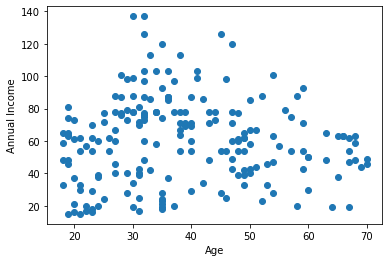

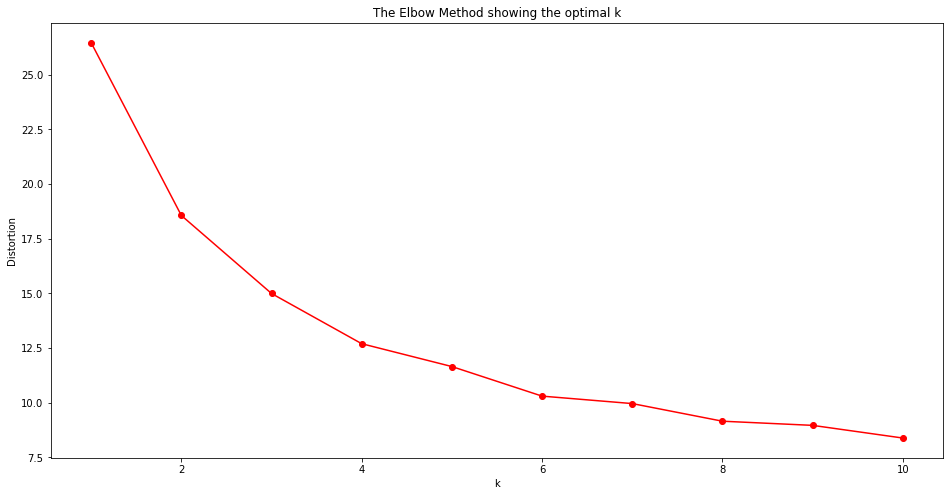

<ipython-input-12-403c5ec86ff0>:44: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  clust1 = np.vstack(row for row in matrix if row[-1] == 0)
<ipython-input-12-403c5ec86ff0>:45: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  clust2 = np.vstack(row for row in matrix if row[-1] == 1)
<ipython-input-12-403c5ec86ff0>:46: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  clust3 = np.vstack(row for row in matrix if row[-1] == 2)


NameError: name 'block1' is not defined

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import kmeans
from scipy.spatial import distance

url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

#проверка (все верно)

print(k_means(data,3))
print(kmeans(data,3)) 


#Age-Annual Income

plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

distortions = []
K = range(1,11)
for k in K:
    distortions.append(k_means(data[:,[2,3]], k)[1])

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'o-r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Thus, k = 3


In [ ]:
#Age-Spending Score

plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

distortions = []
K = range(1,11)
for k in K:
    distortions.append(k_means(data[:,[2,4]], k)[1])
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'o-r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Thus, k = 4

In [ ]:
#Annual Income-Spending Score

plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

distortions = []
K = range(1,11)
for k in K:
    distortions.append(k_means(data[:,[3,4]], k)[1])
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'o-r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#Thus, k = 5